In [40]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [41]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
dataset_path = '/kaggle/input/in-vehicle-coupon-recommendation/in-vehicle-coupon-recommendation.csv'
df = pd.read_csv(dataset_path)

/kaggle/input/in-vehicle-coupon-recommendation/in-vehicle-coupon-recommendation.csv


In [42]:
# Display the first few rows of the dataset
print(df.head())


       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8           

In [43]:
# Get a summary of the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [44]:

# Statistical summary of numerical features
print(df.describe())



        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

In [45]:
# Checking for missing values
print(df.isnull().sum())



destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [46]:
# Identifying categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['number']).columns
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
       'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')
Numerical Columns: Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')


In [49]:
# Define a threshold (e.g., 50% missing values)
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

In [56]:
# Fill missing values in categorical columns using mode
for col in categorical_columns:
    if col in df.columns:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
#print(df[col])

In [58]:
df['passanger'] = df['passanger'].replace({'less1': 'Less than 1', 'Less1': 'Less than 1'})

In [59]:
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

KeyError: "['car'] not in index"

In [28]:
# Scale numerical variables

scaler = StandardScaler()
numerical_features = ['temperature', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


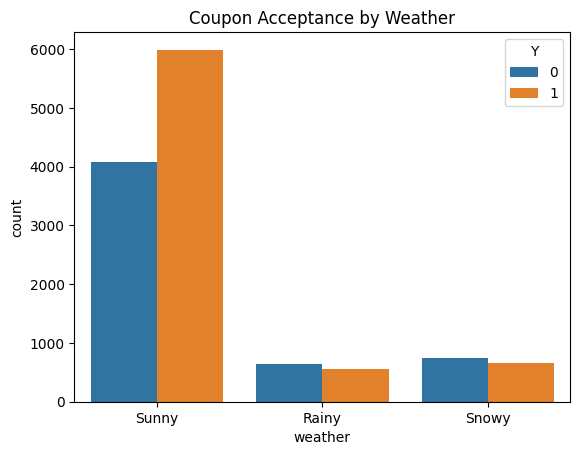

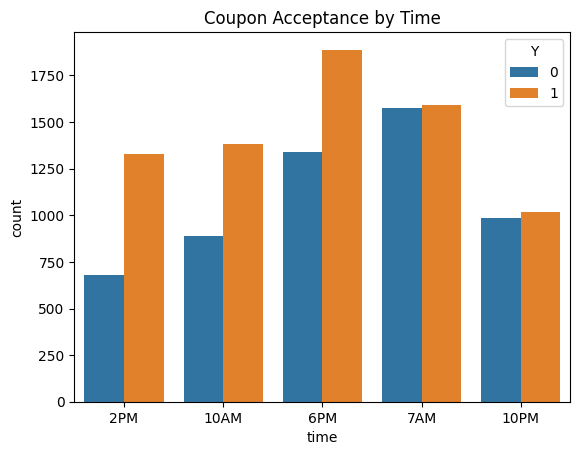

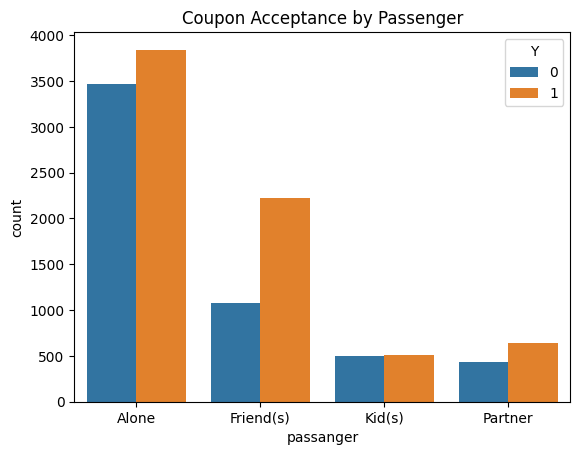

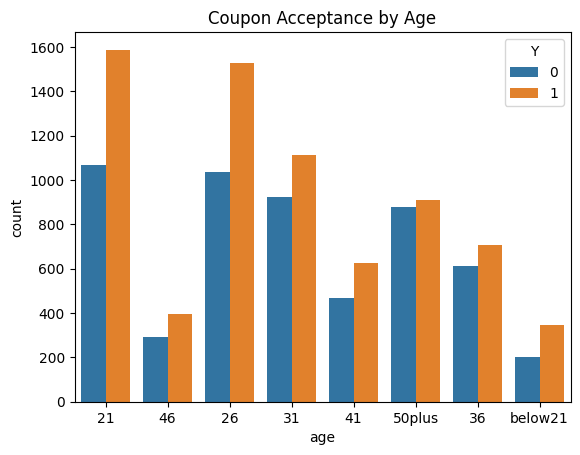

In [21]:
def bar_plot(feature, title, df):
    sns.countplot(data=df, x=feature, hue='Y')
    plt.title(title)
    plt.show()

# Plot for 'weather'
bar_plot('weather', 'Coupon Acceptance by Weather', df)

# Plot for 'time'
bar_plot('time', 'Coupon Acceptance by Time', df)

# Plot for 'passanger'
bar_plot('passanger', 'Coupon Acceptance by Passenger', df)

# Plot for 'age'
bar_plot('age', 'Coupon Acceptance by Age', df)

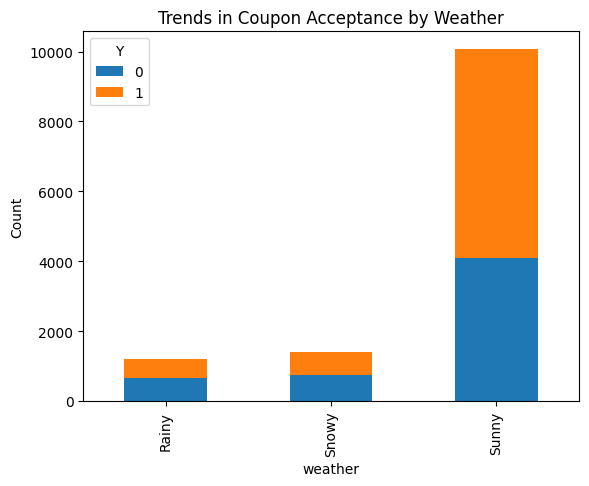

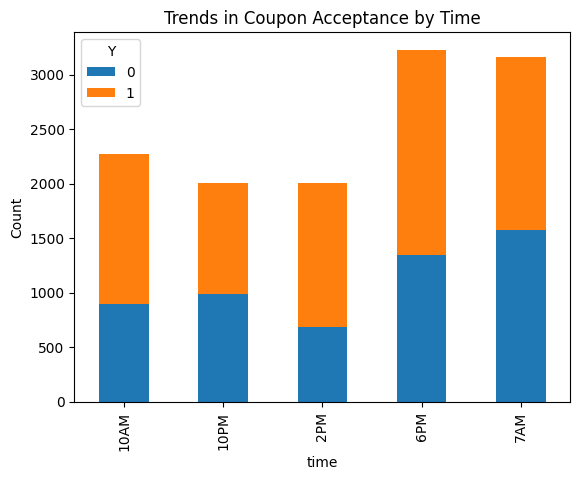

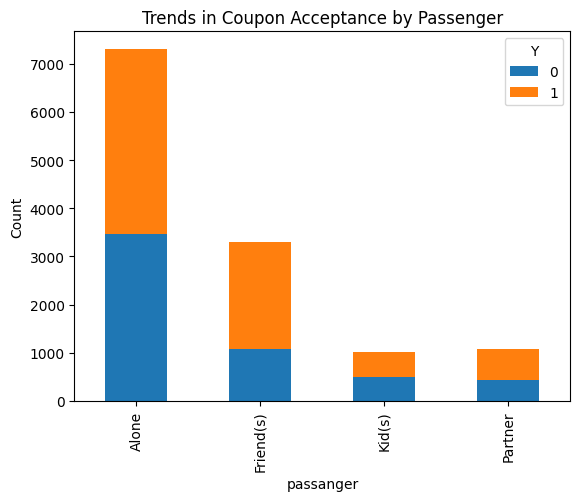

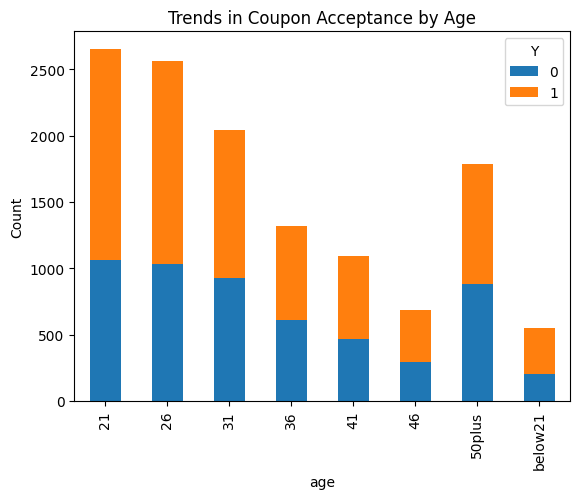

In [22]:
# Define a function to create grouped bar plots
def grouped_bar_plot(feature, title, df):
    grouped_df = df.groupby([feature, 'Y']).size().unstack().fillna(0)
    grouped_df.plot(kind='bar', stacked=True)
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# Plot for 'weather'
grouped_bar_plot('weather', 'Trends in Coupon Acceptance by Weather', df)

# Plot for 'time'
grouped_bar_plot('time', 'Trends in Coupon Acceptance by Time', df)

# Plot for 'passanger'
grouped_bar_plot('passanger', 'Trends in Coupon Acceptance by Passenger', df)

# Plot for 'age'
grouped_bar_plot('age', 'Trends in Coupon Acceptance by Age', df)


In [29]:
# Correlation analysis
correlation_matrix = df.corr()
print(correlation_matrix['Y'].sort_values(ascending=False))


Y                               1.000000
coupon_Carry out & Take away    0.162635
coupon_Restaurant(<20)          0.148542
destination_No Urgent Place     0.130702
passanger_Friend(s)             0.125671
                                  ...   
coupon_Coffee House            -0.094731
toCoupon_GEQ25min              -0.103633
CoffeeHouse_never              -0.121036
expiration_2h                  -0.129920
toCoupon_GEQ5min                     NaN
Name: Y, Length: 97, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

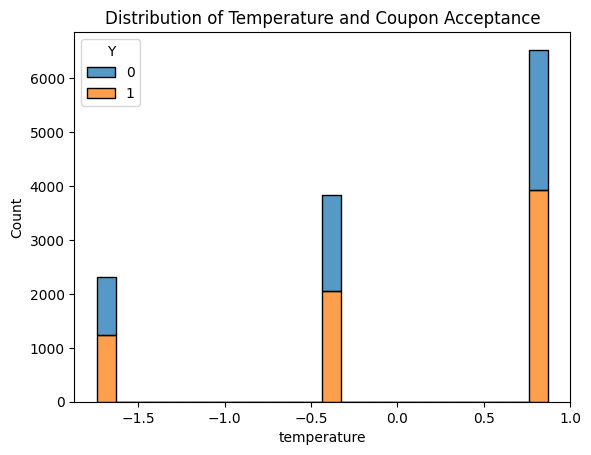

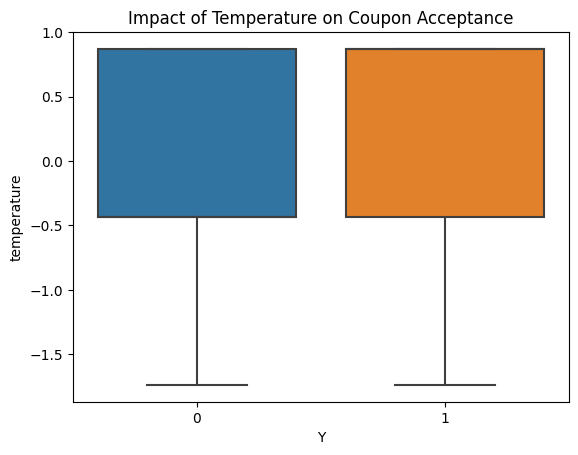

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

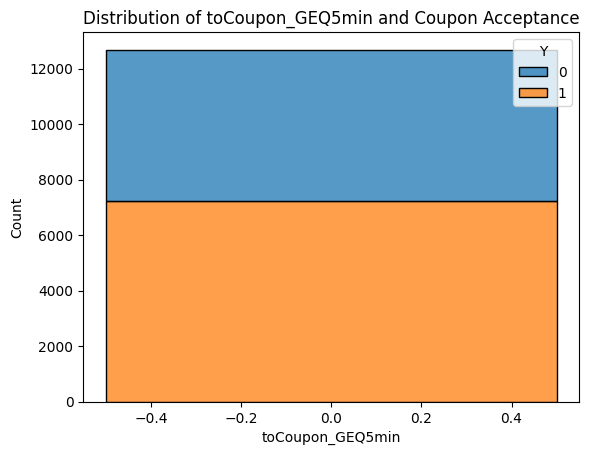

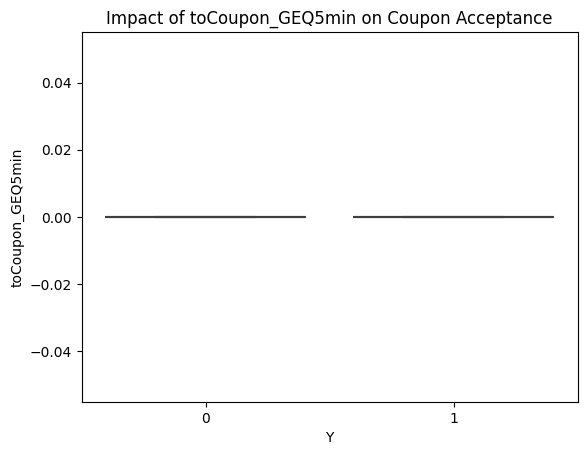

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

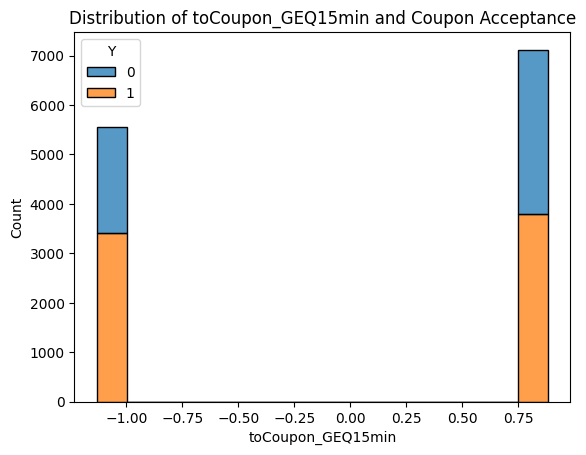

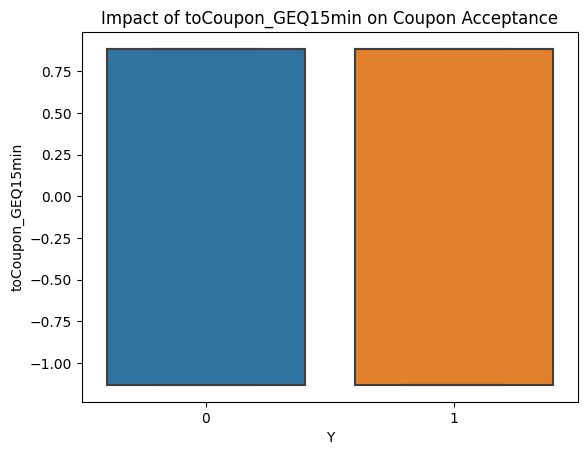

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

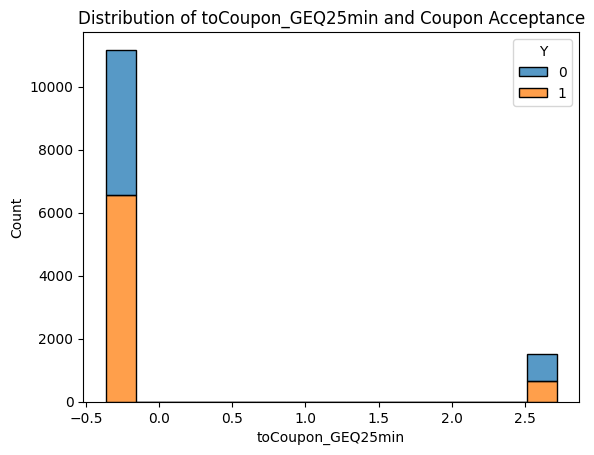

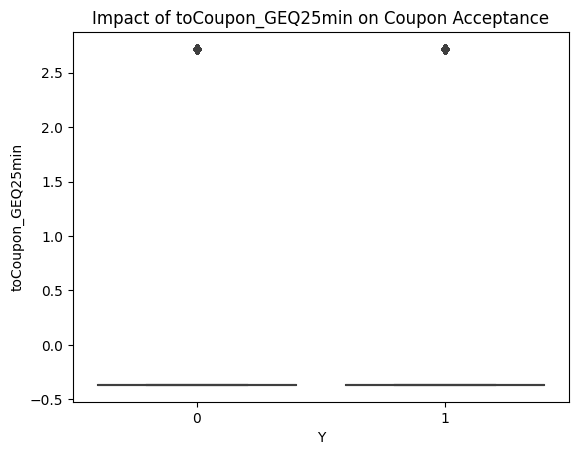

In [31]:
# Define a function to create histograms
# Define a function to create histograms
def histogram(feature, title, df):
    sns.histplot(data=df, x=feature, hue='Y', multiple='stack')
    plt.title(title)
    plt.show()

# Define a function to create box plots
def box_plot(feature, title, df):
    sns.boxplot(data=df, x='Y', y=feature)
    plt.title(title)
    plt.show()

# Histogram and box plot for 'temperature'
histogram('temperature', 'Distribution of Temperature and Coupon Acceptance', df)
box_plot('temperature', 'Impact of Temperature on Coupon Acceptance', df)

# Histogram and box plot for 'toCoupon_GEQ5min'
histogram('toCoupon_GEQ5min', 'Distribution of toCoupon_GEQ5min and Coupon Acceptance', df)
box_plot('toCoupon_GEQ5min', 'Impact of toCoupon_GEQ5min on Coupon Acceptance', df)

# Histogram and box plot for 'toCoupon_GEQ15min'
histogram('toCoupon_GEQ15min', 'Distribution of toCoupon_GEQ15min and Coupon Acceptance', df)
box_plot('toCoupon_GEQ15min', 'Impact of toCoupon_GEQ15min on Coupon Acceptance', df)

# Histogram and box plot for 'toCoupon_GEQ25min'
histogram('toCoupon_GEQ25min', 'Distribution of toCoupon_GEQ25min and Coupon Acceptance', df)
box_plot('toCoupon_GEQ25min', 'Impact of toCoupon_GEQ25min on Coupon Acceptance', df)


In [32]:

# Define the target variable and feature variables
X = df.drop(columns=['Y'])
y = df['Y']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (10147, 96), (10147,)
Test set: (2537, 96), (2537,)


In [33]:

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print(f"Logistic Regression - Accuracy: {accuracy_logreg}, Precision: {precision_logreg}, Recall: {recall_logreg}, F1-score: {f1_logreg}")


Logistic Regression - Accuracy: 0.6834844304296414, Precision: 0.6908060453400504, Recall: 0.7785663591199432, F1-score: 0.7320653987320654


In [34]:

# Initialize and train the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Make predictions
y_pred_dtc = dtc.predict(X_test)

# Evaluate the model
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc)
recall_dtc = recall_score(y_test, y_pred_dtc)
f1_dtc = f1_score(y_test, y_pred_dtc)

print(f"Decision Tree Classifier - Accuracy: {accuracy_dtc}, Precision: {precision_dtc}, Recall: {recall_dtc}, F1-score: {f1_dtc}")


Decision Tree Classifier - Accuracy: 0.6992510839574301, Precision: 0.7252440725244073, Recall: 0.7381121362668559, F1-score: 0.7316215265564545


In [35]:

# Initialize and train the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Make predictions
y_pred_rfc = rfc.predict(X_test)

# Evaluate the model
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)

print(f"Random Forest Classifier - Accuracy: {accuracy_rfc}, Precision: {precision_rfc}, Recall: {recall_rfc}, F1-score: {f1_rfc}")


Random Forest Classifier - Accuracy: 0.7437918801734332, Precision: 0.7421825143586471, Recall: 0.8254080908445706, F1-score: 0.7815860215053763


In [36]:
import pandas as pd

# Create a DataFrame to compare the models
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_logreg, accuracy_dtc, accuracy_rfc],
    'Precision': [precision_logreg, precision_dtc, precision_rfc],
    'Recall': [recall_logreg, recall_dtc, recall_rfc],
    'F1-score': [f1_logreg, f1_dtc, f1_rfc]
})

print(results)


                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.683484   0.690806  0.778566  0.732065
1        Decision Tree  0.699251   0.725244  0.738112  0.731622
2        Random Forest  0.743792   0.742183  0.825408  0.781586


In [37]:

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='f1')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   6.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   5.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   4.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   5.7s
[CV] END 

In [38]:
# Initialize the Random Forest Classifier with the best parameters
best_rfc = RandomForestClassifier(**best_params, random_state=42)
best_rfc.fit(X_train, y_train)

# Make predictions
y_pred_best_rfc = best_rfc.predict(X_test)

# Evaluate the tuned model
accuracy_best_rfc = accuracy_score(y_test, y_pred_best_rfc)
precision_best_rfc = precision_score(y_test, y_pred_best_rfc)
recall_best_rfc = recall_score(y_test, y_pred_best_rfc)
f1_best_rfc = f1_score(y_test, y_pred_best_rfc)

print(f"Tuned Random Forest Classifier - Accuracy: {accuracy_best_rfc}, Precision: {precision_best_rfc}, Recall: {recall_best_rfc}, F1-score: {f1_best_rfc}")


Tuned Random Forest Classifier - Accuracy: 0.7441860465116279, Precision: 0.7325581395348837, Recall: 0.8495386799148332, F1-score: 0.7867236279986854
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   5.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   5.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   4.7s
[CV] END max_depth=None, 